In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

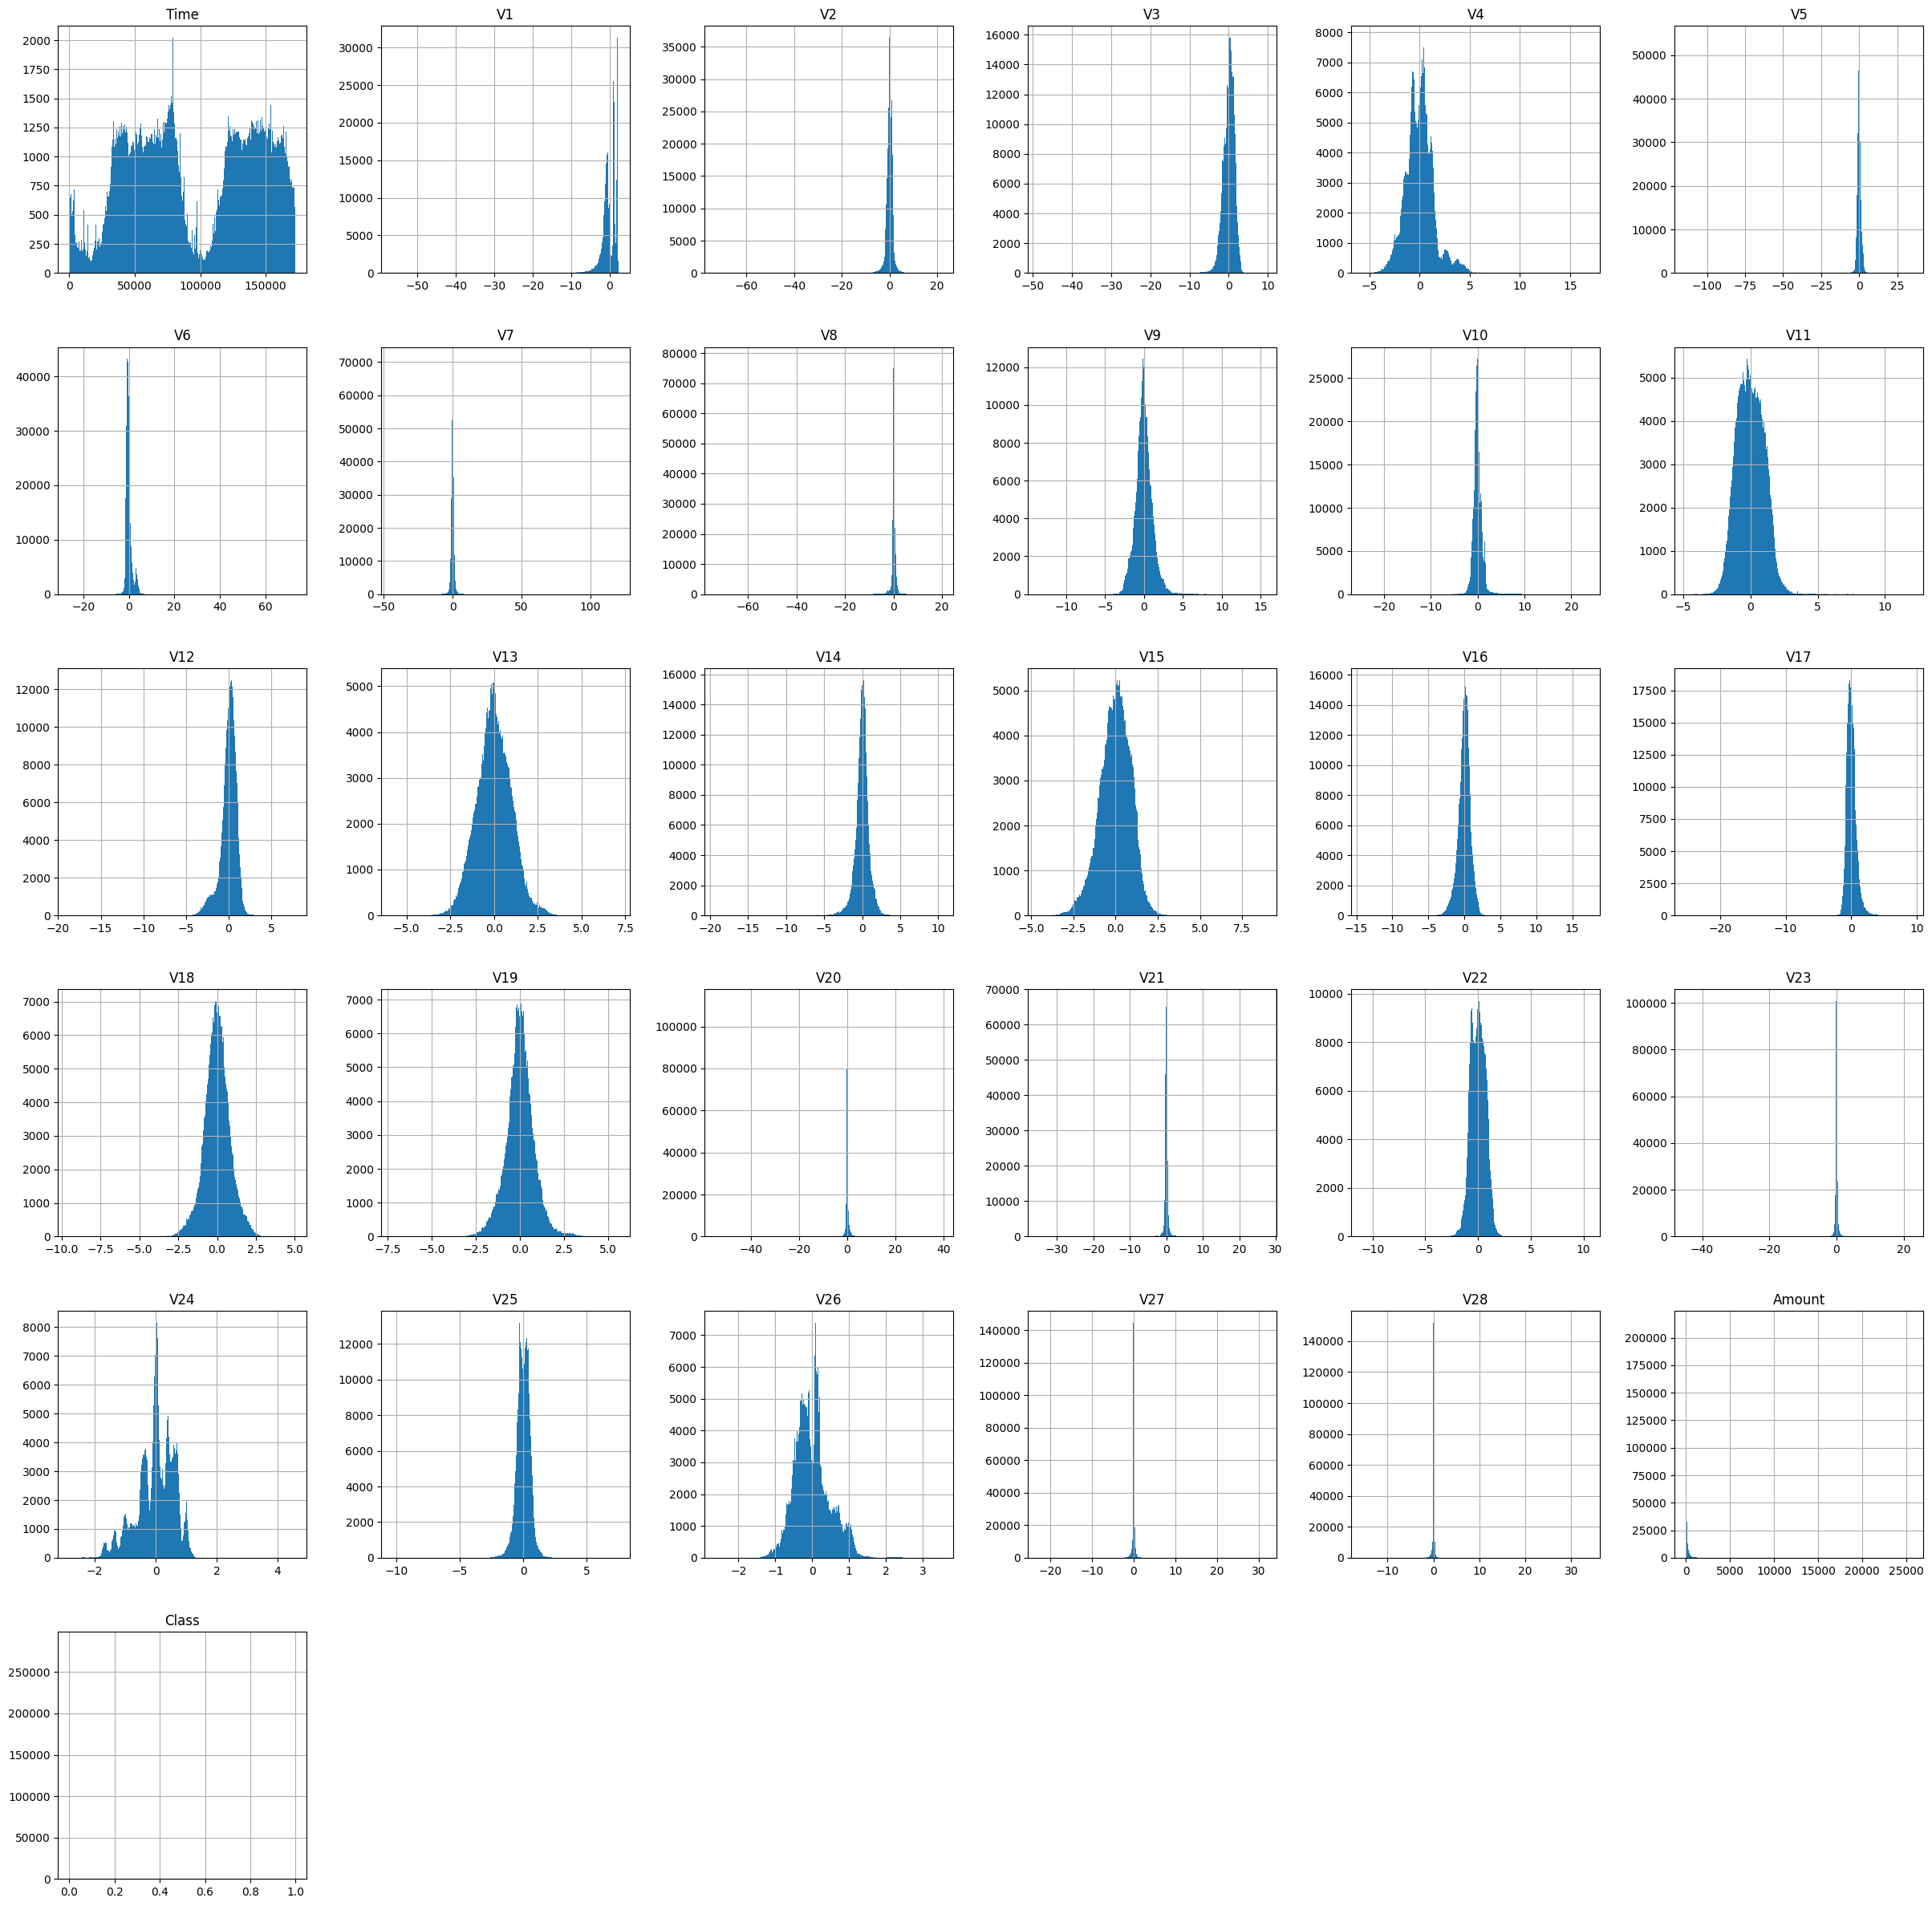

In [5]:
df.hist(bins=330, figsize=(30, 30))

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
100 - df['Class'].mean() * 100 

np.float64(99.827251436938)

In [8]:
# This is your NULL accuracy

In [9]:
# OR 
null_acc = max(df['Class'].value_counts(normalize=True)) * 100
null_acc

99.82725143693798

In [10]:
# We need to scale the data
# As our data is completely wiithin a narrow limits and the data is not evenly spreadz  

<Axes: >

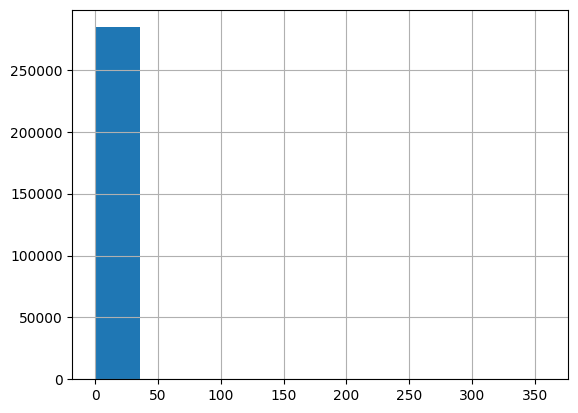

In [11]:
# Preprocessing
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1)) # we convert the 1D array to 2D array by reshape(-1, 1)
new_df['Amount'].hist() # RobustScaler takes only a 2D ndarray column as an argument


 

In [12]:
# Use RobustScaler when there are outliers with extreme values, 
# thus causing high standard deviation

In [13]:
new_df['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [14]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
# Scaling Time Column
# As you see that the time column does not have that many outliers

In [16]:
# Min-Max Normalization
time = df['Time']
new_df['Time'] = (time - time.min() ) / (time.max() - time.min())
new_df['Time']

0         0.000000
1         0.000000
2         0.000006
3         0.000006
4         0.000012
            ...   
284802    0.999965
284803    0.999971
284804    0.999977
284805    0.999977
284806    1.000000
Name: Time, Length: 284807, dtype: float64

<Axes: >

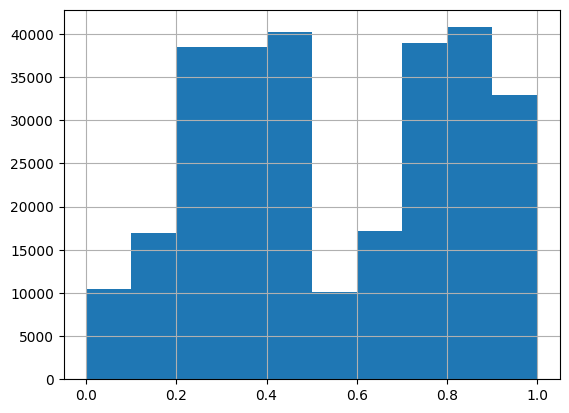

In [17]:
new_df['Time'].hist()

In [18]:
new_df['Time'].describe() # Reduced Standard Deviation, and all the values are scaled from 0-1

count    284807.000000
mean          0.548717
std           0.274828
min           0.000000
25%           0.313681
50%           0.490138
75%           0.806290
max           1.000000
Name: Time, dtype: float64

In [19]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [20]:
# Train test split
new_df = new_df.sample(frac=1, random_state=1) # frac = 1 means, it shuffles full(100%) of the data of andom_state=1
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,0.070050,-0.854023,0.547347,0.616448,-0.101785,-0.608492,-0.288559,-0.606199,-0.900746,-0.201311,-0.196039,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,-0.600684,0.096501,0.710309,0.778924,0.353867,0.953048,-0.103542,0.128899,-0.964070,-0.477130,-0.009041,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,-0.528357,-0.813214,0.111898,1.133875,-0.649766,0.861035,0.583787,-0.344094,0.028312,0.219760,0.206028,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,0.334853,0.905210,-0.277872,-1.336179,-0.012238,0.212828,0.769345,-1.010534,0.357288,-0.125585,0.315823,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,-0.696578,0.101512,-0.433200,-0.634867,-1.188354,1.028063,0.576121,1.068353,0.332690,-0.362811,-0.105286,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,0.346951,0.276998,-0.167592,0.213818,-0.139022,-1.375023,-0.426207,0.771636,0.967956,-0.170608,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,-0.400162,0.113700,1.666005,1.587666,-0.683250,-1.059042,0.368635,-0.608646,0.089697,1.132807,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,-0.480985,-0.395574,-0.129168,-0.294736,-1.026354,-0.348257,-0.199641,1.589715,-0.284752,-0.374565,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,0.102675,1.051043,1.643280,1.265712,-0.306132,-0.004562,0.739688,-0.931197,0.364436,-0.199706,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [21]:
train, test, val = new_df[:240000], new_df[240000: 262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(),val['Class'].value_counts(),

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [22]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()

In [23]:
type(train_np)

numpy.ndarray

In [24]:
#  For X_train we need all the rows and all the columns except the last(Class) column
X_train, Y_train = train_np[:, :-1], train_np[:, -1]
X_train

array([[ 6.93938377e-01, -6.11711999e-01, -7.69705324e-01, ...,
         6.65013699e-02,  2.21179560e-01, -2.82400615e-01],
       [ 4.53377471e-01, -8.14681711e-01,  1.31921886e+00, ...,
         1.62427330e-01,  5.94562455e-02, -2.79745686e-01],
       [ 4.76769758e-01, -3.18193485e-01,  1.11861770e+00, ...,
         2.49049701e-01,  9.25156059e-02, -2.94976595e-01],
       ...,
       [ 3.70375943e-01,  9.67188894e-01, -6.18302932e-01, ...,
         9.24735473e-04, -8.26733997e-03,  1.10528890e-01],
       [ 7.15224084e-01, -1.36707671e+00,  3.03643946e-01, ...,
         1.84152390e-01, -3.64596803e-01,  5.91071054e+00],
       [ 7.62899903e-01, -3.19605768e-01,  9.71067967e-01, ...,
        -7.21894694e-02, -1.17084764e-01,  9.54377140e-02]],
      shape=(240000, 30))

In [25]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=len(Y_train))
logReg.fit(X_train, Y_train)
logReg.score(X_train, Y_train)

0.9992375

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
trainX, testX, trainY, testY = train_test_split(new_df.iloc[:, :-1], new_df.iloc[:, -1] )
LogReg = LogisticRegression()
LogReg.fit(trainX, trainY)
Y_predict = LogReg.predict(testX)
score = metrics.accuracy_score(testY, Y_predict)
score

0.9991854161399961

In [27]:
confu = metrics.confusion_matrix(Y_predict, testY) # TN FP
confu                                              # FN TP

array([[71078,    47],
       [   11,    66]])

In [28]:
type(train_np)

numpy.ndarray

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model  = LogisticRegression()
logistic_model.fit(X_train, Y_train)
logistic_model.score(X_train, Y_train)

0.9992375

In [30]:
confu

array([[71078,    47],
       [   11,    66]])

In [31]:
# Printing the classification Report - as part of validation
X_val = val_np[:, :-1]
Y_val = val_np[:, -1]
Y_val_predict = logistic_model.predict(X_val)
from sklearn import metrics
print(metrics.classification_report(Y_val, Y_val_predict, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.83      0.56      0.67        36

    accuracy                           1.00     22807
   macro avg       0.92      0.78      0.83     22807
weighted avg       1.00      1.00      1.00     22807



Text(0, 0.5, 'True Positive Rate (Sensitivity)')

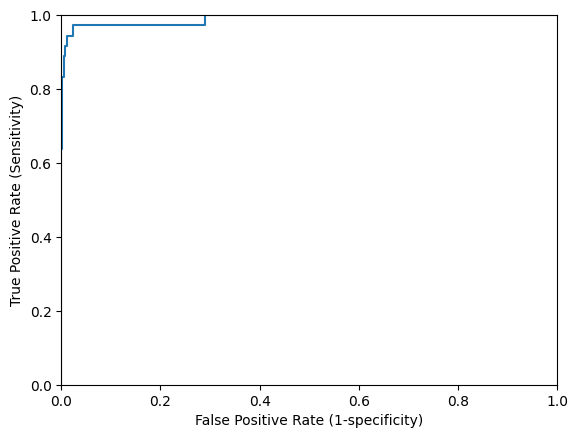

In [32]:
import matplotlib.pyplot as plt
Y_val_prob = logistic_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_val, Y_val_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [ ]:
### improving the model's predictoin for actual fraud 
from keras.models import Sequential # To create a sequence or to build a model step by step
from keras.layers import InputLayer, Dense, BatchNormalization
#                   for - Input      Output   Normalizing previous output of each layer before feeding to the next layer


from keras.callbacks import ModelCheckpoint # Helps select the best model

In [36]:
shallow_nn = Sequential() # Creates an empty() sequential model
shallow_nn.add(InputLayer((X_train.shape[1], ))) # adds the number of features (COls) in your dataset
shallow_nn.add(Dense(2, 'relu')) # 2-neurons, ReLu activatio - outputs(0, max)
shallow_nn.add(BatchNormalization()) # Normalizes the output of the hidden layer before sending them to the next layer- helps strining stability, prevents exploding/ vanishing gradients
shallow_nn.add(Dense(1, 'sigmoid')) # 1-neuron - gives a single probability (0 and 1), sigmoid activation - used for binary classification
# Outputs only the probability of the class, wee need to cretae out own function to classify

In [38]:
checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [39]:
shallow_nn.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=5, callbacks=checkpoint)


Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9873 - loss: 0.0502 - val_accuracy: 0.9992 - val_loss: 0.0062
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9992 - val_loss: 0.0071
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9990 - val_loss: 0.0086
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9989 - val_loss: 0.0102
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0098


In [40]:
shallow_nn.predict(X_train)

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 569us/step


array([[1.01238096e-04],
       [8.34914317e-05],
       [5.13511914e-05],
       ...,
       [3.68600486e-05],
       [1.12507129e-04],
       [3.04242974e-04]], shape=(240000, 1), dtype=float32)

In [43]:
(shallow_nn.predict(X_train).flatten() > 0.5).astype(int)

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 713us/step


array([0, 0, 0, ..., 0, 0, 0], shape=(240000,))

In [44]:
# COnverting the above statement into a function
def neural_net_predictions(model, X): # model , test/train dataset
    return (model.predict(X).flatten() > 0.5).astype(int)
    

In [45]:
neural_net_predictions(shallow_nn, X_train)

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 6s 732us/step


array([0, 0, 0, ..., 0, 0, 0], shape=(240000,))

In [46]:
print(metrics.classification_report(Y_val, neural_net_predictions(shallow_nn, X_val), target_names=['Not Fraud', 'Fraud']))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.70      0.78      0.74        36

    accuracy                           1.00     22807
   macro avg       0.85      0.89      0.87     22807
weighted avg       1.00      1.00      1.00     22807



In [ ]:
# High precision mean low false positive
# High recall mean low false negative
# High f1 score means - both low FP and low FN